In [7]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA 

### setting up parematers for plot 

In [72]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()

#default fig size 

sns.mpl.rc('figure',figsize=(16,6))

### loading data 

In [71]:
df = pd.read_csv('NSWIncome.csv')

In [65]:
df.head()

,Income,income_d1
year,,
1991,32164,-324.0
1992,29530,-2634.0
1993,28916,-614.0
1994,30358,1442.0
1995,34289,3931.0


In [64]:
df.tail()


,Income,income_d1
year,,
2016,113852,4480.0
2017,117994,4142.0
2018,124138,6144.0
2019,131479,7341.0
2020,129736,-1743.0


### add axis titles and lables

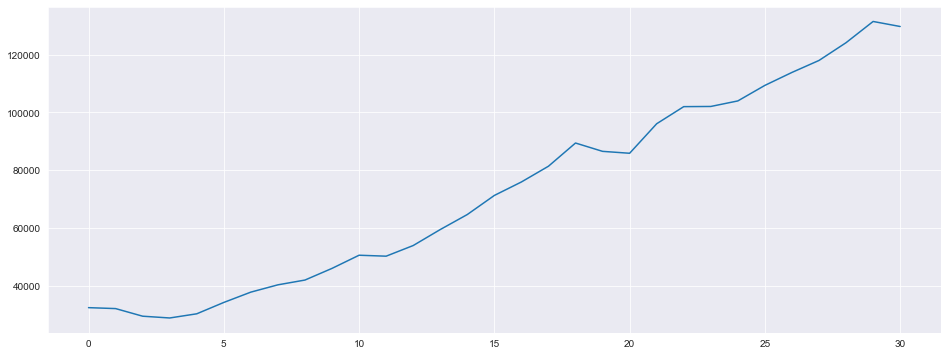

In [12]:
df['Income'].plot()
plt.show()

## generating first difference

In [74]:
df['income_d1'] = df['Income'].diff()
df = df.dropna(axis=0)
df.head()

,year,Income,income_d1
1,1991,32164,-324.0
2,1992,29530,-2634.0
3,1993,28916,-614.0
4,1994,30358,1442.0
5,1995,34289,3931.0


In [75]:
df.tail()

,year,Income,income_d1
26,2016,113852,4480.0
27,2017,117994,4142.0
28,2018,124138,6144.0
29,2019,131479,7341.0
30,2020,129736,-1743.0



## a) plot income and first diff  

### * add dicky fuller test here also *
add more to the graph

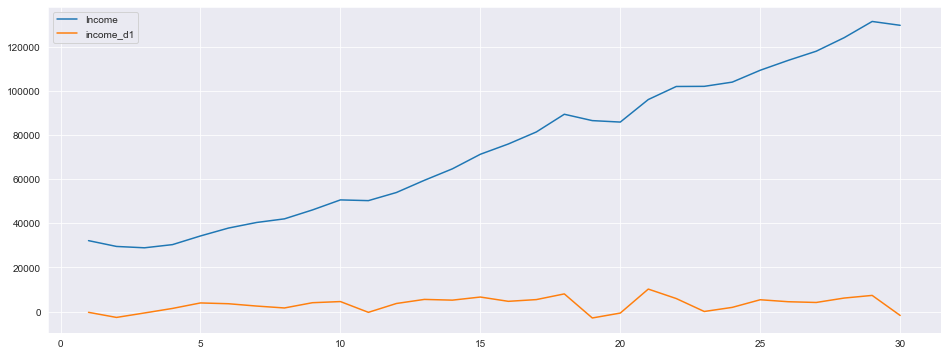

In [79]:
df['Income'].plot()
df['income_d1'].plot()
plt.legend()
plt.show()

## b) plot the ACF 

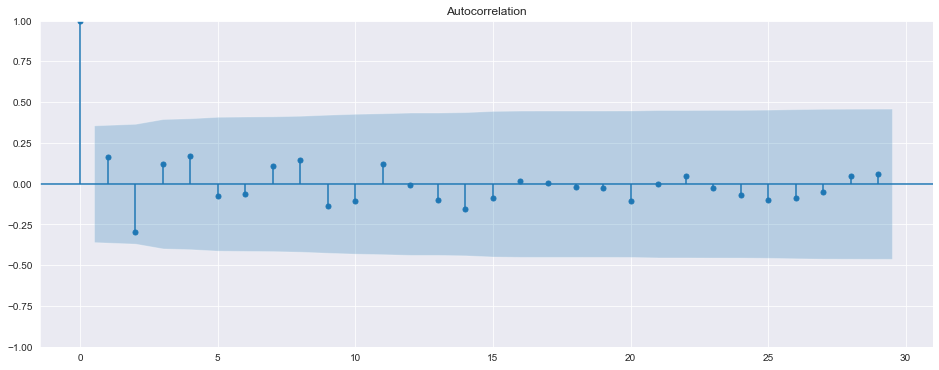

In [15]:
sm.graphics.tsa.plot_acf(df['income_d1'].values.squeeze(), lags=29) 
plt.show()

gotta be an MA(1)

## c) PACF function of an AR model 

/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


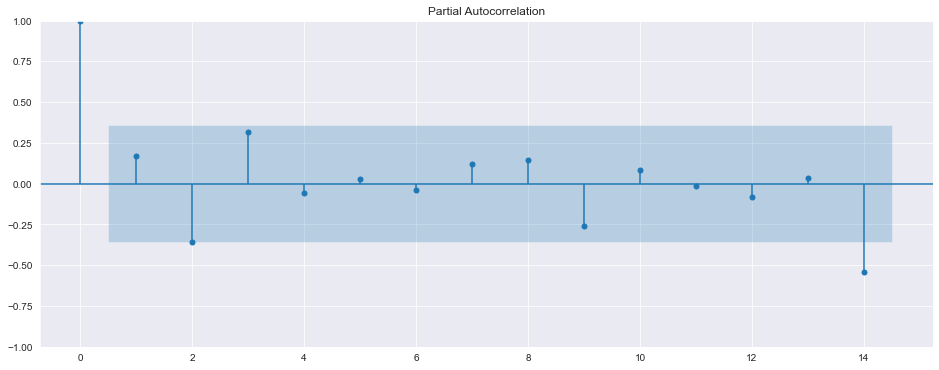

In [16]:
sm.graphics.tsa.plot_pacf(df['income_d1'].values.squeeze(), lags=14) 
plt.show()

c) gotta be an AR(3) or AR(1) - explain reasoning 



 

In [77]:
mod = ARIMA(df['income_d1'][df.year<=2018], order=(2,0,2))
res = mod.fit()
print(res.summary())

/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              income_d1   No. Observations:                   28
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -258.193
Date:                Thu, 08 Sep 2022   AIC                            528.387
Time:                        18:04:30   BIC                            536.380
Sample:                             0   HQIC                           530.830
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3288.8351    675.687      4.867      0.000    1964.512    4613.158
ar.L1         -0.9893      0.214     -4.615      0.000      -1.409      -0.569
ar.L2         -0.5416      0.236     -2.296      0.0

## *add in plot diagnostics here*

d) ARMA PACF and ACF not valid 
AIC and BIC 

infromation criteria - these measure model complexity penalise us for model complexity using MLE 
    lower AIC/BIC is better we want equal performance with least complexity (on the training set 
    
  ARMA - 
  Michael tested all different ps and qs to compare them in table and ARMA(1,1) 
 note this doesnt refute that AR(3) was wrong as ARMA changes how lags and errors interact 
 



e) Ljung and Box is to test the ACFS, 
H0 : complexity is adequate 
Ha: the model is too complex 

 ARIMA(2,2) gets the lowest score here

## f)  
(predicted - observed)

$\Delta \widehat{Income}_{2019|2018}$



In [49]:
res.forecast(steps=2)

/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


28    4674.049151
29    1875.151440
Name: predicted_mean, dtype: float64

In [67]:
abs (4674.049151 -7341.0 )

2666.950849

$\Delta \widehat{Income}_{2020|2018}$

In [66]:
res.forecast(steps=4)

/Users/jackreid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


28    4674.049151
29    1875.151440
30    3937.126428
31    3413.167240
Name: predicted_mean, dtype: float64

$\Delta \widehat{Income}_{2020|2018}$

In [69]:
abs (1875.151440 --1743.0 )

3618.15144